In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [2]:
df=pd.DataFrame({'x':[1,2,3,4,5],
                 'y':[0,1,0,1,0]})

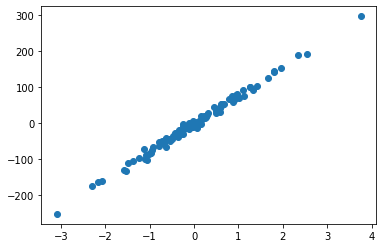

In [3]:
from sklearn.datasets import make_regression
X,y=make_regression(n_features=2,n_samples=100,n_targets=1)
pl.scatter(X[:,0],y)

In [4]:
x=df['x']
y=df['y']
x_x=x-np.mean(x)
y_y=y-np.mean(y)
x_x_=np.square(x_x)
x_xy_y=x_x*y_y

In [5]:
df['x-xbar']=x-np.mean(x)
df['y-ybar']=y-np.mean(y)
df['(x-xbar)square']=np.square(df['x-xbar'])
df['(x-xbar)(y-ybar)']=np.multiply(df['x-xbar'],df['y-ybar'])

In [6]:
df

,x,y,x-xbar,y-ybar,(x-xbar)square,(x-xbar)(y-ybar)
0,1,0,-2.0,-0.4,4.0,0.8
1,2,1,-1.0,0.6,1.0,-0.6
2,3,0,0.0,-0.4,0.0,-0.0
3,4,1,1.0,0.6,1.0,0.6
4,5,0,2.0,-0.4,4.0,-0.8


(-0.3, 1.3)

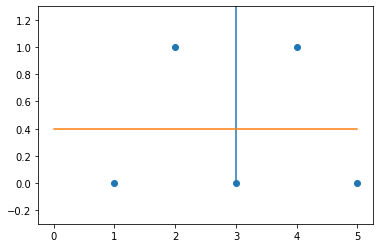

In [9]:
pl.scatter(df['x'],df['y'])
pl.plot([np.mean(x)]*6,np.arange(6))
pl.plot(np.arange(6),[np.mean(y)]*6)
pl.ylim([-0.3,1.3])

# y=mx+c

In [10]:
m=np.sum(df['(x-xbar)(y-ybar)'])/np.sum(df['(x-xbar)square'])

In [11]:
c=np.mean(y)-m*np.mean(x)

In [12]:
eq=m*x+c

In [13]:
df['pred']=m*df['x']+c
df['error']=df['y']-df['pred']

In [14]:
df

,x,y,x-xbar,y-ybar,(x-xbar)square,(x-xbar)(y-ybar),pred,error
0,1,0,-2.0,-0.4,4.0,0.8,0.4,-0.4
1,2,1,-1.0,0.6,1.0,-0.6,0.4,0.6
2,3,0,0.0,-0.4,0.0,-0.0,0.4,-0.4
3,4,1,1.0,0.6,1.0,0.6,0.4,0.6
4,5,0,2.0,-0.4,4.0,-0.8,0.4,-0.4


In [22]:
m,c

(array([0.0033099]), array([0.38805022]))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
x=np.array(df['x']).reshape(-1,1)
y=np.array(df['y']).reshape(-1,1)
lreg=LinearRegression().fit(x,y)
reg=LogisticRegression().fit(x,y)
lreg.coef_,lreg.intercept_,reg.coef_,reg.intercept_

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[2.10280254e-18]]),
 array([0.4]),
 array([[8.055863e-06]]),
 array([-0.4054914]))

In [34]:
reg.predict(x),lreg.predict(x)

(array([0, 0, 0, 0, 0], dtype=int64),
 array([[0.4],
        [0.4],
        [0.4],
        [0.4],
        [0.4]]))

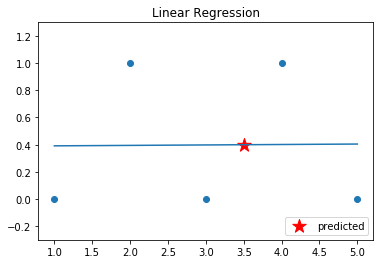

In [21]:
pl.scatter(df['x'],df['y'])
# pl.plot([np.mean(x)]*6,np.arange(6),label='slope x')
# pl.plot(np.arange(6),[np.mean(y)]*6,label='slope y')
pl.scatter(3.5,m*3.5+c,marker='*',s=200,color='r',label='predicted')
pl.plot(df['x'],m*df['x']+c)
pl.title('Linear Regression')
pl.ylim([-0.3,1.3])
pl.legend(loc='lower right')

# Single Linear Regression Using gradient Descent method

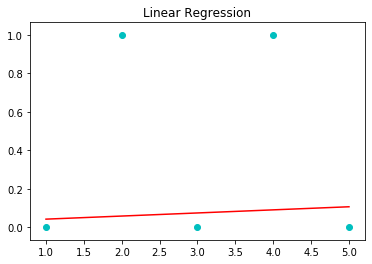

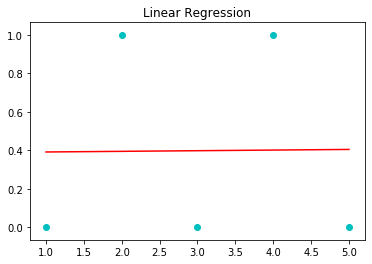

([<matplotlib.lines.Line2D at 0x186b33effc8>],
 array([0.0033099]),
 array([0.38805022]))

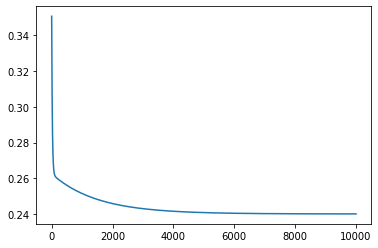

In [20]:
x=df['x']
y=df['y']
n=len(x)
l=0.001
m=np.random.rand(1)
c=np.random.rand(1)
er=[]
epoch=10000
for i in range(epoch):
    y_pred=m*x+c
    d_m=(-2/n)*sum(x*(y-y_pred))
    d_c=(-2/n)*sum((y-y_pred))
    m=m-l*d_m
    c=c-l*d_c
    er.append(np.mean(np.square(y-y_pred)))
    if i==0:
        plot(x,y,m,c)
    if i==9999:
        plot(x,y,m,c)

pl.plot(er),m,c

In [19]:
def plot(x,y,m,c):
    pl.scatter(x,y,c='c')
    pl.plot(x,m*x+c,c='r')
    pl.title('Linear Regression')
    pl.show()

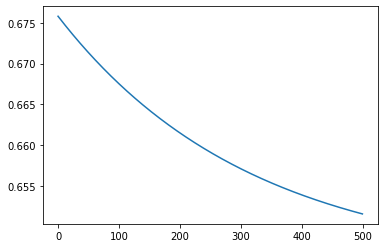

In [165]:
pl.plot(er)

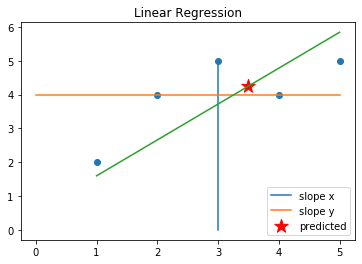

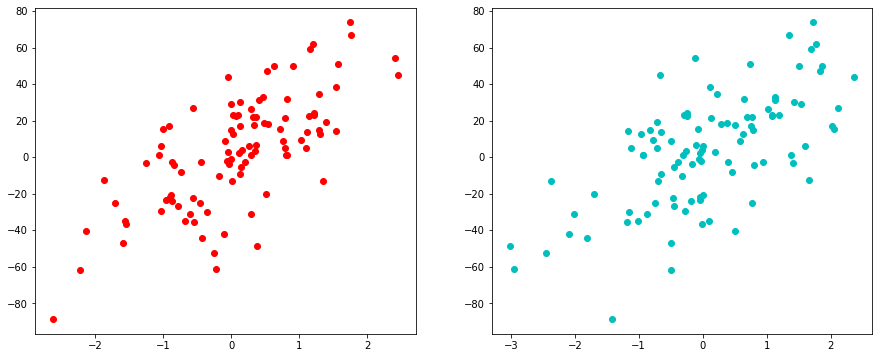

In [122]:
fig,axes=pl.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],y,c='r')
axes[1].scatter(X[:,1],y,c='c')


In [123]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [124]:
linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

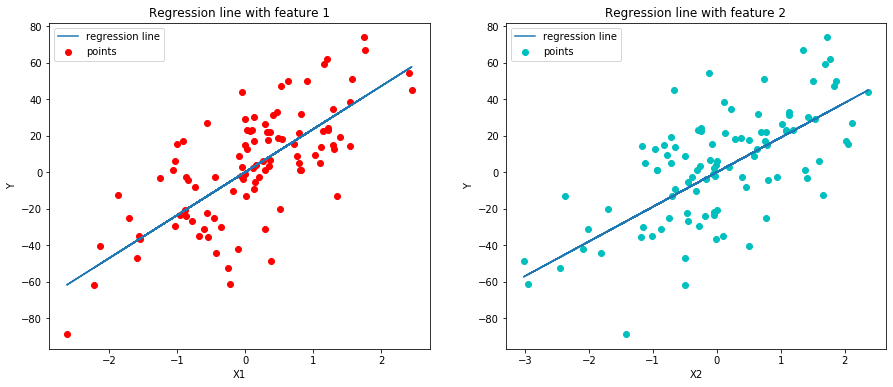

In [158]:
x1=X[:,0]
x2=X[:,1]
m1=linear.coef_[0]
m2=linear.coef_[1]
c=linear.intercept_
fig,axes=pl.subplots(1,2,figsize=(15,6))
axes[0].scatter(x1,y,c='r',label='points')
axes[0].plot(x1,m1*x1+c,label='regression line')
axes[1].scatter(x2,y,c='c',label='points')
axes[1].plot(x2,m2*x2+c,label='regression line')
axes[0].set_title('Regression line with feature 1')
axes[1].set_title('Regression line with feature 2')
axes[0].set_xlabel("X1")
axes[0].set_ylabel("Y")
axes[1].set_xlabel("X2")
axes[1].set_ylabel("Y")
axes[0].legend()
axes[1].legend()

# Multiple Linear Regression Using gradient Descent method

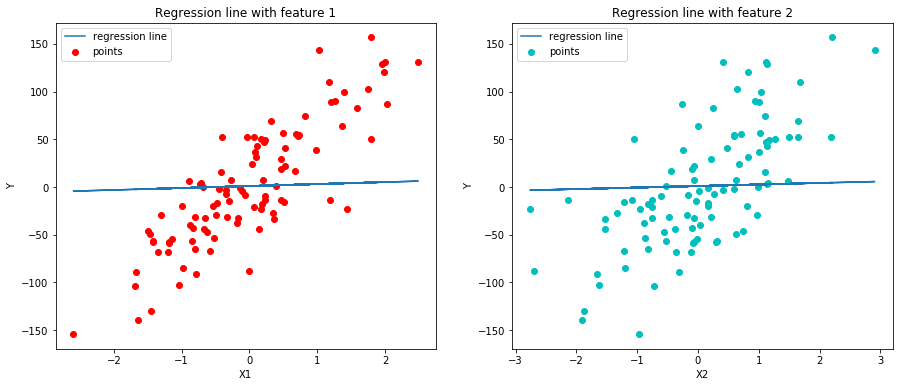

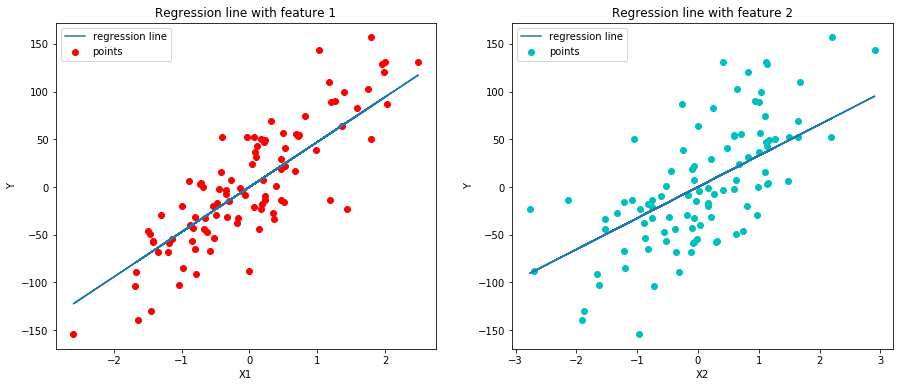

In [274]:
X=X
y=y.reshape(-1,1)
n=len(X)
m=np.random.rand(2).reshape(-1,1)
c=np.random.rand(1).reshape(-1,1)
lr=0.01
epochs=10000
err=[]
for i in range(epochs):
    y_pred=np.dot(X,m)+c
#     print(y_pred.shape)
    d_m=(-2/n)*(np.dot(X.T,(y-y_pred)))
#     print(d_m.shape)
#     print(d_m)
    d_c=(-2/n)*sum((y-y_pred))
    m=m-lr*d_m
    c=c-lr*d_c
    err.append(np.mean(np.square(y-y_pred)))
    if i==0:
        plot_2regs(X,y,m,c)
    if i==epochs-1:
        plot_2regs(X,y,m,c)

In [281]:
m,c

(array([[47.14910999],
        [32.73179374]]),
 array([[-1.77502557e-14]]))

In [272]:
def plot_2regs(X,y,m,c):
    x1=np.array(X[:,0]).reshape(-1,1)
    x2=np.array(X[:,1]).reshape(-1,1)
    y=y
    m1=m[0]
    m2=m[1]
    c=c
    fig,axes=pl.subplots(1,2,figsize=(15,6))
    axes[0].scatter(x1,y,c='r',label='points')
    axes[0].plot(x1,m1*x1+c,label='regression line')
    axes[1].scatter(x2,y,c='c',label='points')
    axes[1].plot(x2,m2*x2+c,label='regression line')
    axes[0].set_title('Regression line with feature 1')
    axes[1].set_title('Regression line with feature 2')
    axes[0].set_xlabel("X1")
    axes[0].set_ylabel("Y")
    axes[1].set_xlabel("X2")
    axes[1].set_ylabel("Y")
    axes[0].legend()
    axes[1].legend()

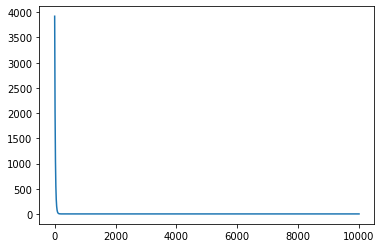

In [275]:
pl.plot(err)

In [289]:
def plot_2regss(X,y,m,c):
    x1=np.array(X[:,0]).reshape(-1,1)
    x2=np.array(X[:,1]).reshape(-1,1)
    y=y
    m1=m[0][0]
    m2=m[0][1]
    c=c
    fig,axes=pl.subplots(1,2,figsize=(15,6))
    axes[0].scatter(x1,y,c='r',label='points')
    axes[0].plot(x1,m1*x1+c,label='regression line')
    axes[1].scatter(x2,y,c='c',label='points')
    axes[1].plot(x2,m2*x2+c,label='regression line')
    axes[0].set_title('Regression line with feature 1')
    axes[1].set_title('Regression line with feature 2')
    axes[0].set_xlabel("X1")
    axes[0].set_ylabel("Y")
    axes[1].set_xlabel("X2")
    axes[1].set_ylabel("Y")
    axes[0].legend()
    axes[1].legend()

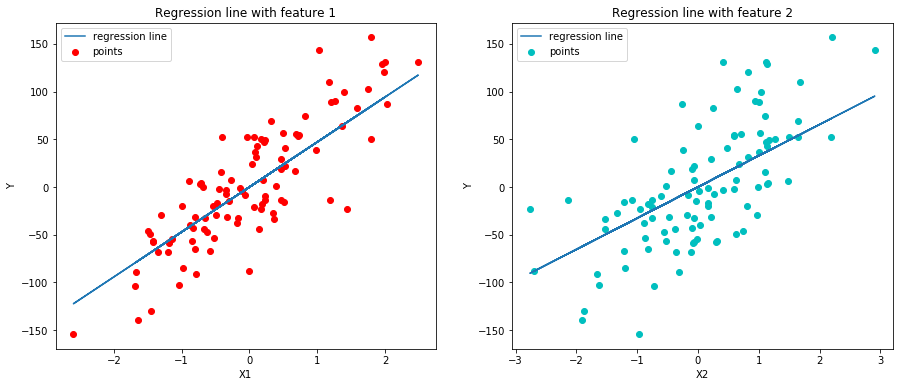

In [290]:
linear=LinearRegression()
linear.fit(X,y)
plot_2regss(X,y,linear.coef_,linear.intercept_)

In [282]:
linear.coef_,linear.intercept_

(array([[47.14910999, 32.73179374]]), array([-1.55431223e-15]))

In [291]:
import seaborn as sns

In [303]:
X,y=make_regression(n_features=5,n_samples=100,n_targets=1)

In [304]:
df=pd.DataFrame({'x1':X[:,0],
                 'x2':X[:,1],
                 'x3':X[:,2],
                 'x4':X[:,3],
                 'x5':X[:,4],
                 'y':y})

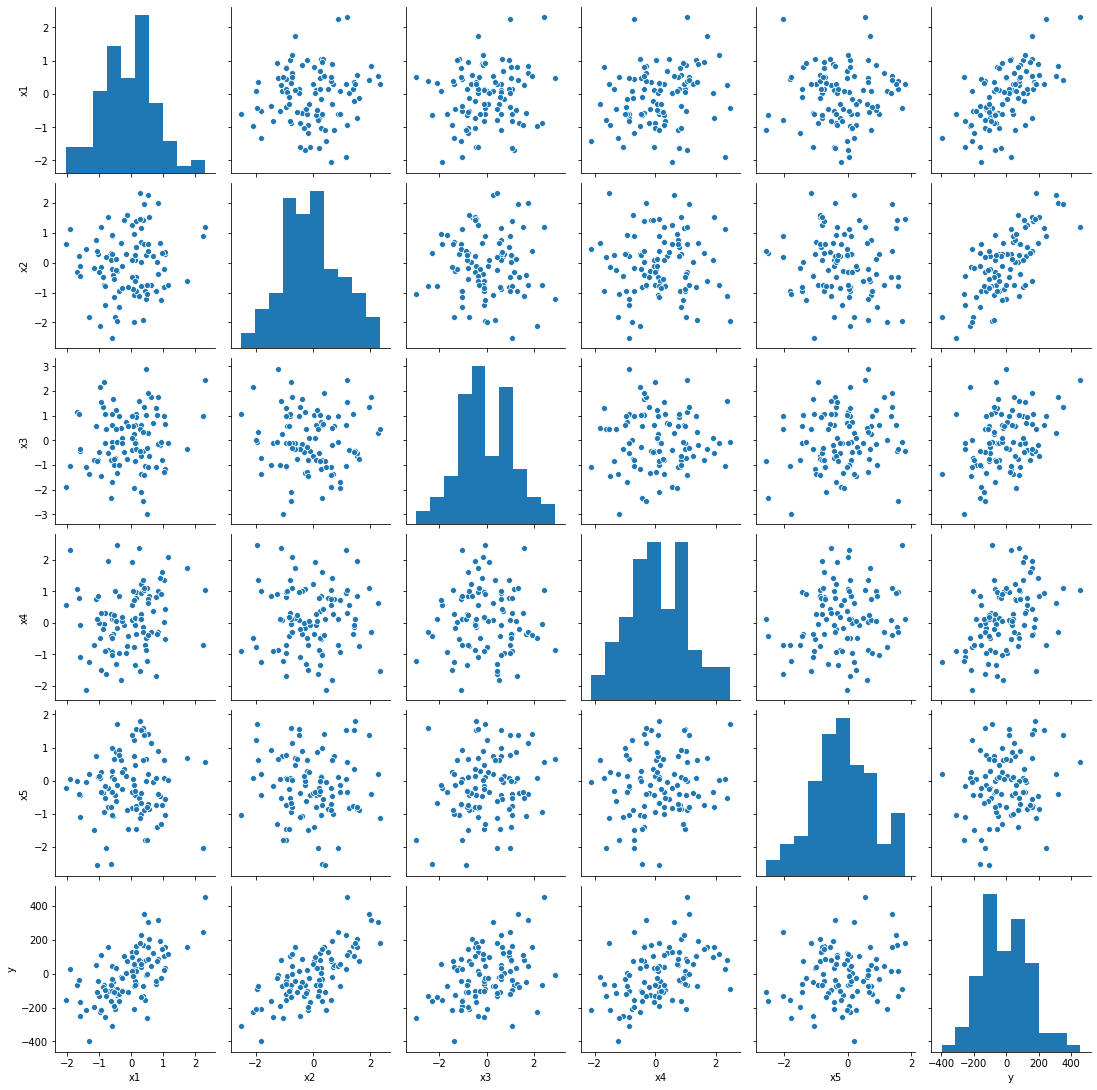

In [307]:
sns.pairplot(df)
pl.show()

In [51]:
def error(y,y_pred):
    logloss=-1*sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    mse=np.mean((y-y_pred)**2)
    return logloss,mse

y=np.array([0,1,0,1,0])
y_pred=np.array([0.9,0.1,0.3,0.2,0.5])
logl,mse=error(y,y_pred)

In [52]:
logl,mse

(7.26443022292087, 0.5200000000000001)

In [53]:
np.log(0)

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [54]:
1/(1+np.exp(-y_pred))

array([0.7109495 , 0.52497919, 0.57444252, 0.549834  , 0.62245933])